In the following exercises we are going to program our own implementation of a K-Means algorithms. There is a dataset1.csv Download dataset1.csvavailable. This dataset includes meteorological data (weather data) from the weather station at De Bilt for the year 2000. The dataset is part of the freely available weather data gathered by the KNMI since 1901, for several weather stations in The Netherlands1.

The data that we are using has 11 attributes:

YYYYMMDD: date in year, months, days;

FG: day average windspeed (in 0.1 m/s);

TG: day average temperature (in 0.1 degrees Celsius);

TN: minimum temperature of day (in 0.1 degrees Celsius);

TX: maximum temperature of day (in 0.1 degrees Celsius);

SQ: amount of sunshine that day (in 0.1 hours); -1 for less than 0.05 hours;

DR: total time of precipitation (in 0.1 hours);

RH: total sum of precipitation that day (in 0.1 mm); -1 for less than 0.05mm.

Data is entered in a comma-seperated format, which can be easily loaded into Python by using the numpy-module (the use of numpy is recommended as it supplies you with valuable additions to work with vectors and arrays). Use the following code-excerpt to import the data into Python:

import numpy as np

data = np.genfromtxt('dataset1.csv', delimiter=';', usecols=[1,2,3,4,5,6,7], converters={5: lambda s: 0 if s == b"-1" else float(s), 7: lambda s: 0 if s == b"-1" else float(s)})

Note that the converters are needed to transform the -1's in the columns SQ (hours sunshine) and RH (amount of rain) to a more useful 0. This is a minor correction to make the data better represent what it means, improving the distance calculations between different data points.

We deliberately skip column 0 since that contains our date, which we will use to create the labels for the data. Instead of using the year, month, day as label, we will generalise to seasons, which we do as follows2:

dates = np.genfromtxt('dataset1.csv', delimiter=';', usecols=[0])
labels = []
for label in dates:
  if label < 20000301:
    labels.append('winter')
  elif 20000301 <= label < 20000601:
    labels.append('lente')
  elif 20000601 <= label < 20000901:
    labels.append('zomer')
  elif 20000901 <= label < 20001201:
    labels.append('herfst')
  else: # from 01-12 to end of year
    labels.append('winter')

Exercise
We are going to re-cluster the available data. This would show us whether we can indeed find 4 different groups in the data (one for each season). We again need to import the data and labels as we did above (we will need the labels later to verify whether the clusters made by K-Means indeed reflect the true season of the data points).

Write a bare metal k-Means clustering implementation, to cluster the data in k groups.

How many clusters can you (reliably) detect? Use a scree plot to determine the optimal size of k for this dataset. Include the determined value of k in the documentation included with the code.

Hints:

Don't forget to apply normalisation.
(it is not mentioned in the reader, but it's essential nevertheless - ask your teacher if you missed that)
Start the x axis of the scree plot with 1.
In the scree plot, select the point where the slope changest fastest.
Don't forget to work with squared distances.
Options for Additional Challenges (and Kudos):
(that is, provided that the assignment above is successfully fulfilled) :

(difficult) Instead of using the wet thumb to determine the optimum k, filter the noise from the scree plot data,
then determine the optimum k mathematically by determining
where the second derivative of the scree plot is nearest to zero.

For interested readers, the complete dataset (all years, all weather stations) is available on https://www.knmi.nl/nederland-nu/klimatologie/daggegevensLinks to an external site..↩

Note that we use the meteorological seasons, not the astronomical ones, which makes sense as we are working with meteorological data.↩

Hints:

Don't forget to apply normalisation.
(it is not mentioned in the reader, but it's essential nevertheless - ask your teacher if you missed that)

Data vorm: (366, 7)
Aantal labels: 366
Data succesvol ingeladen!
Data is genormaliseerd
Gemiddelde van genormaliseerde data: [-5.80137031e-17 -9.22152458e-17 -1.89283926e-16 -1.88070567e-17
 -1.12614835e-17 -6.09712645e-17  1.33469435e-16]
Standaarddeviatie van genormaliseerde data: [1. 1. 1. 1. 1. 1. 1.]
Test afstand tussen punt 0 en 1: 1.4004
  Starten met k=1 clusters
  Convergentie bereikt na 2 iteraties
k=1: WCSS=2562.00
  Starten met k=2 clusters
  Convergentie bereikt na 5 iteraties
k=2: WCSS=1693.94
  Starten met k=3 clusters
  Convergentie bereikt na 5 iteraties
k=3: WCSS=1286.00
  Starten met k=4 clusters
  Convergentie bereikt na 12 iteraties
k=4: WCSS=1119.96
  Starten met k=5 clusters
  Convergentie bereikt na 11 iteraties
k=5: WCSS=1046.15
  Starten met k=6 clusters
  Convergentie bereikt na 10 iteraties
k=6: WCSS=936.67
  Starten met k=7 clusters
  Convergentie bereikt na 9 iteraties
k=7: WCSS=860.64
  Starten met k=8 clusters
  Convergentie bereikt na 14 iteraties
k=8: 

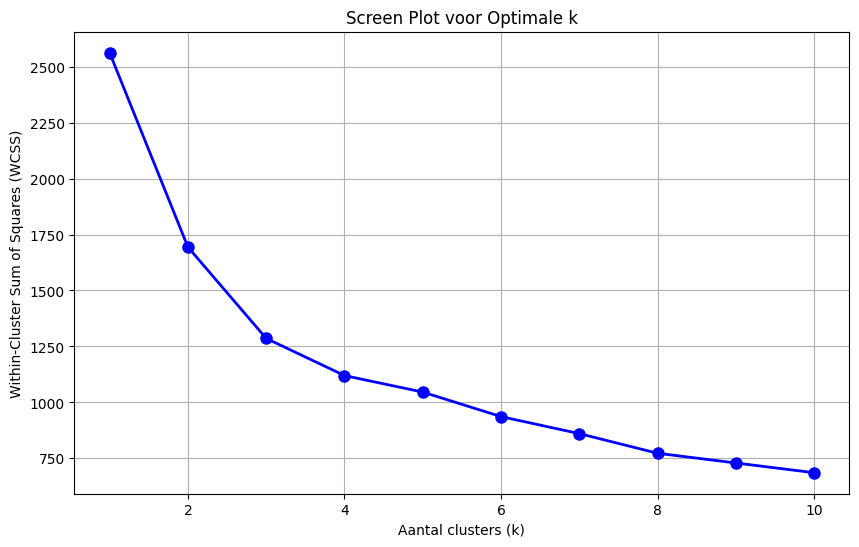

WCSS waardes overzicht:
k=1: 2562.00
k=2: 1693.94
k=3: 1286.00
k=4: 1119.96
k=5: 1046.15
k=6: 936.67
k=7: 860.64
k=8: 772.83
k=9: 729.46
k=10: 685.97
k=2->k=3: 868.06
k=3->k=4: 407.94
k=4->k=5: 166.04
k=5->k=6: 73.81
k=6->k=7: 109.48
k=7->k=8: 76.03
k=8->k=9: 87.81
k=9->k=10: 43.37
k=10->k=11: 43.49

Optimale k bepaald: 4
  Starten met k=4 clusters
  Convergentie bereikt na 14 iteraties
Finale WCSS met k=4: 1125.39
Cluster samenstelling per seizoen:
Cluster 0: {'winter': 57, 'lente': 36, 'herfst': 20}
Cluster 1: {'lente': 23, 'zomer': 36, 'herfst': 34, 'winter': 5}
Cluster 2: {'winter': 29, 'lente': 14, 'zomer': 2, 'herfst': 24}
Cluster 3: {'lente': 19, 'zomer': 54, 'herfst': 13}


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Stap 1: Data inladen
data = np.genfromtxt('dataset1.csv', delimiter=';', usecols=[1,2,3,4,5,6,7], 
                     converters={5: lambda s: 0 if s == b"-1" else float(s), 
                                7: lambda s: 0 if s == b"-1" else float(s)})

# Labels voor seizoenen
dates = np.genfromtxt('dataset1.csv', delimiter=';', usecols=[0])
labels = []
for label in dates:
    if label < 20000301:
        labels.append('winter')
    elif 20000301 <= label < 20000601:
        labels.append('lente')
    elif 20000601 <= label < 20000901:
        labels.append('zomer')
    elif 20000901 <= label < 20001201:
        labels.append('herfst')
    else:
        labels.append('winter')

print(f"Data vorm: {data.shape}")
print(f"Aantal labels: {len(labels)}")
print("Data succesvol ingeladen!")

# Normalisatie 
def normalize_data(data):
    gemiddelde = np.mean(data, axis=0)
    standaard_dev = np.std(data, axis=0)
    genormaliseerd = (data - gemiddelde) / standaard_dev
    return genormaliseerd

normalized_data = normalize_data(data)
print("Data is genormaliseerd")
print(f"Gemiddelde van genormaliseerde data: {np.mean(normalized_data, axis=0)}")
print(f"Standaarddeviatie van genormaliseerde data: {np.std(normalized_data, axis=0)}")

def squared_distance(punt1, punt2):
    # Euclidean afstand gekwadrateerd zodat het sneller gaat
    return np.sum((punt1 - punt2) ** 2)

# Test
test_punt1 = normalized_data[0]
test_punt2 = normalized_data[1] 
test_afstand = squared_distance(test_punt1, test_punt2)
print(f"Test afstand tussen punt 0 en 1: {test_afstand:.4f}")

#  K-means 
def kmeans(data, k, max_iteraties=100):
    n_samples, n_features = data.shape
    print(f"  Starten met k={k} clusters")
    
    # Random centroids kiezen om mee te beginnen
    centroids = data[np.random.choice(n_samples, k, replace=False)]
    
    for i in range(max_iteraties):
        # Elk punt aan dichtstbijzijnde centroid toewijzen
        afstanden = np.zeros((n_samples, k))
        for j in range(k):
            for idx in range(n_samples):
                afstanden[idx, j] = squared_distance(data[idx], centroids[j])
        
        cluster_toewijzingen = np.argmin(afstanden, axis=1)
        
        # Centroids updaten naar gemiddelde van punten in cluster
        nieuwe_centroids = np.zeros((k, n_features))
        for j in range(k):
            cluster_punten = data[cluster_toewijzingen == j]
            if len(cluster_punten) > 0:
                nieuwe_centroids[j] = np.mean(cluster_punten, axis=0)
            else:
                nieuwe_centroids[j] = centroids[j]  # behoud oude als cluster leeg is
        
        # Kijken of we klaar zijn (convergentie)
        if np.allclose(centroids, nieuwe_centroids):
            print(f"  Convergentie bereikt na {i+1} iteraties")
            break
            
        centroids = nieuwe_centroids
    
    # Uiteindelijke inertia berekenen (WCSS)
    inertia = 0
    for idx in range(n_samples):
        cluster = cluster_toewijzingen[idx]
        inertia += squared_distance(data[idx], centroids[cluster])
    
    return centroids, cluster_toewijzingen, inertia



k_waardes = range(1, 11)
wcss_waardes = []

for k in k_waardes:
    centroids, toewijzingen, wcss = kmeans(normalized_data, k)
    wcss_waardes.append(wcss)
    print(f"k={k}: WCSS={wcss:.2f}")


plt.figure(figsize=(10, 6))
plt.plot(k_waardes, wcss_waardes, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Aantal clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Screen Plot voor Optimale k')
plt.grid(True)
plt.show()

print("WCSS waardes overzicht:")
for k, wcss in zip(k_waardes, wcss_waardes):
    print(f"k={k}: {wcss:.2f}")

slopes = []
for i in range(1, len(wcss_waardes)):
    slope = wcss_waardes[i-1] - wcss_waardes[i]
    slopes.append(slope)
    print(f"k={i+1}->k={i+2}: {slope:.2f}")

optimale_k = 4  
print(f"\nOptimale k bepaald: {optimale_k}")

finale_centroids, finale_toewijzingen, finale_wcss = kmeans(normalized_data, optimale_k)

print(f"Finale WCSS met k={optimale_k}: {finale_wcss:.2f}")

print("Cluster samenstelling per seizoen:")
for cluster in range(optimale_k):
    cluster_indices = np.where(finale_toewijzingen == cluster)[0]
    cluster_labels = [labels[i] for i in cluster_indices]
    
    # Seizoenen tellen per cluster
    seizoen_counts = {}
    for seizoen in cluster_labels:
        seizoen_counts[seizoen] = seizoen_counts.get(seizoen, 0) + 1
    
    print(f"Cluster {cluster}: {seizoen_counts}")
